In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.utils import normalize
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#load dataset
xFile = '/content/drive/My Drive/Colab Notebooks/sign-language-digits/X.npy'
yFile = '/content/drive/My Drive/Colab Notebooks/sign-language-digits/Y.npy'
X = np.load(xFile)
Y = np.load(yFile)
print(X.shape, ', ', X.dtype)
print(Y.shape, ', ', Y.dtype)
class_names = ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1']

(2062, 64, 64) ,  float32
(2062, 10) ,  float64


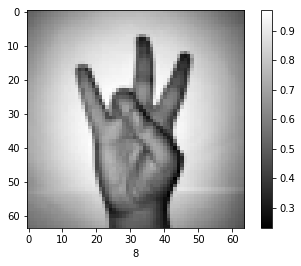

In [3]:
#display an image
i = 433
image = X[i]
plt.figure()
plt.imshow(image, cmap= 'gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(Y[i])])
plt.show()

In [4]:
#normalize and split train/test sets
#X=X/255
xTrain_orig, xTest_orig, yTrain, yTest = train_test_split(X, Y, test_size = 0.1, random_state = 1, shuffle = True)
xTrain = xTrain_orig/255
xTest = xTest_orig/255
#add more dimention for xTrain and xTest to feed in conv2D
if xTrain.ndim<4:
    xTrain=np.expand_dims(xTrain, axis = 3)
if xTest.ndim<4:
    xTest=np.expand_dims(xTest, axis = 3)
print(xTrain.ndim)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

4
(1855, 64, 64, 1)
(1855, 10)
(207, 64, 64, 1)
(207, 10)


In [5]:
#make model
def build(width, height, depth, classes):
    # initialize the model along with the input shape to be
    # "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
 
    # first CONV => RELU => POOL layer set
    model.add(Conv2D(32, (5, 5), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # second CONV => RELU => POOL layer set
    model.add(Conv2D(64, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # third CONV => RELU => POOL layer set
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # first set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(400))
    model.add(Activation("relu"))
    #model.add(Dropout(0.25))
    
    model.add(Dense(120))
    model.add(Activation("relu"))
    #model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    model.add(Dense(40))
    model.add(Activation("relu"))
    
    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model
model = build(width=64, height=64, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model.summary()

W0619 15:43:57.242277 140171166279552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 15:43:57.262632 140171166279552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 15:43:57.267296 140171166279552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 15:43:57.294644 140171166279552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 15:43:57.295434 1401711662

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

In [6]:
N=30
#H = model.fit(xTrain, yTrain, epochs = N, validation_data=(xTest, yTest))
H = model.fit(xTrain, yTrain, epochs = N, batch_size =32, validation_data=(xTest, yTest))

W0619 15:43:58.529656 140171166279552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1855 samples, validate on 207 samples
Epoch 1/30
1855/1855 [==============================] - 4s 2ms/step - loss: 0.9201 - acc: 0.7272 - val_loss: 14.0690 - val_acc: 0.0966
Epoch 2/30
1855/1855 [==============================] - 1s 490us/step - loss: 0.3057 - acc: 0.9116 - val_loss: 3.4766 - val_acc: 0.3816
Epoch 3/30
1855/1855 [==============================] - 1s 494us/step - loss: 0.1434 - acc: 0.9704 - val_loss: 0.8362 - val_acc: 0.7778
Epoch 4/30
1855/1855 [==============================] - 1s 486us/step - loss: 0.0957 - acc: 0.9741 - val_loss: 0.6510 - val_acc: 0.7923
Epoch 5/30
1855/1855 [==============================] - 1s 489us/step - loss: 0.0547 - acc: 0.9908 - val_loss: 0.6766 - val_acc: 0.8357
Epoch 6/30
1855/1855 [==============================] - 1s 486us/step - loss: 0.0448 - acc: 0.9871 - val_loss: 0.4204 - val_acc: 0.8792
Epoch 7/30
1855/1855 [==============================] - 1s 484us/step - loss: 0.0300 - acc: 0.9941 - val_loss: 0.4694 - val_acc: 0.8937
Ep

1855/1855 [==============================] - 0s 167us/step
Train accuracy: 0.9994609164420485
207/207 [==============================] - 0s 157us/step
Test accuracy: 0.9516908212560387
Saved model to disk


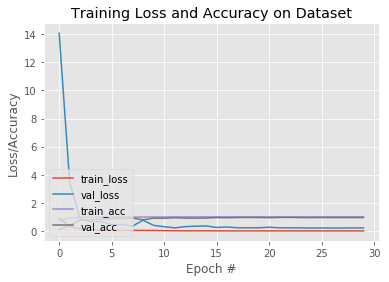

In [8]:
#make predictions
predictions = model.predict(xTest)
#evaluate model
train_loss, train_acc = model.evaluate(xTrain, yTrain)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)
#plot graph
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

#save model
model.save("model-sign-language-digit.h5")
print("Saved model to disk")

In [ ]:
#graph
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.argmax(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

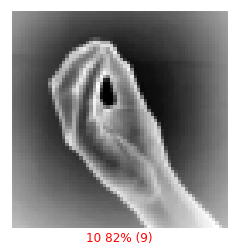

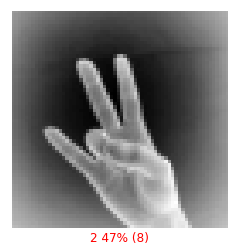

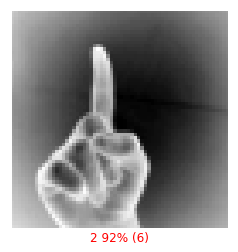

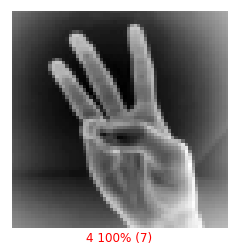

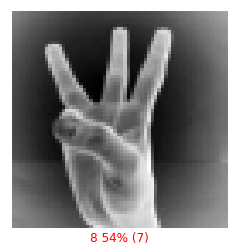

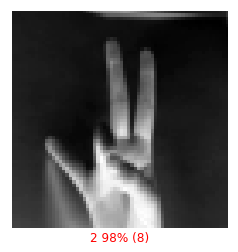

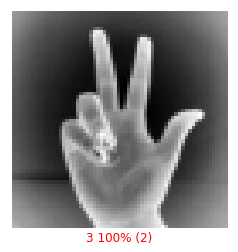

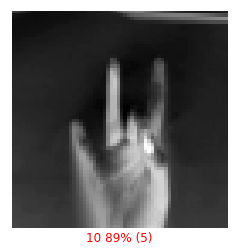

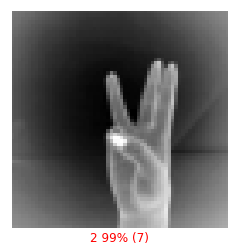

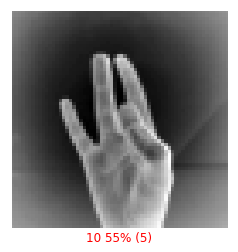

False: 10 / 207


In [10]:
j = 0
for i in range (len(yTest)):
  if (np.argmax(predictions[i]) != np.argmax(yTest[i])):
    j = j+1
    plt.figure()
    plot_image(i, predictions, yTest, xTest_orig)
    #plot_value_array(i, predictions, yTest)
    plt.show()
print("False:",j,'/',len(yTest))  

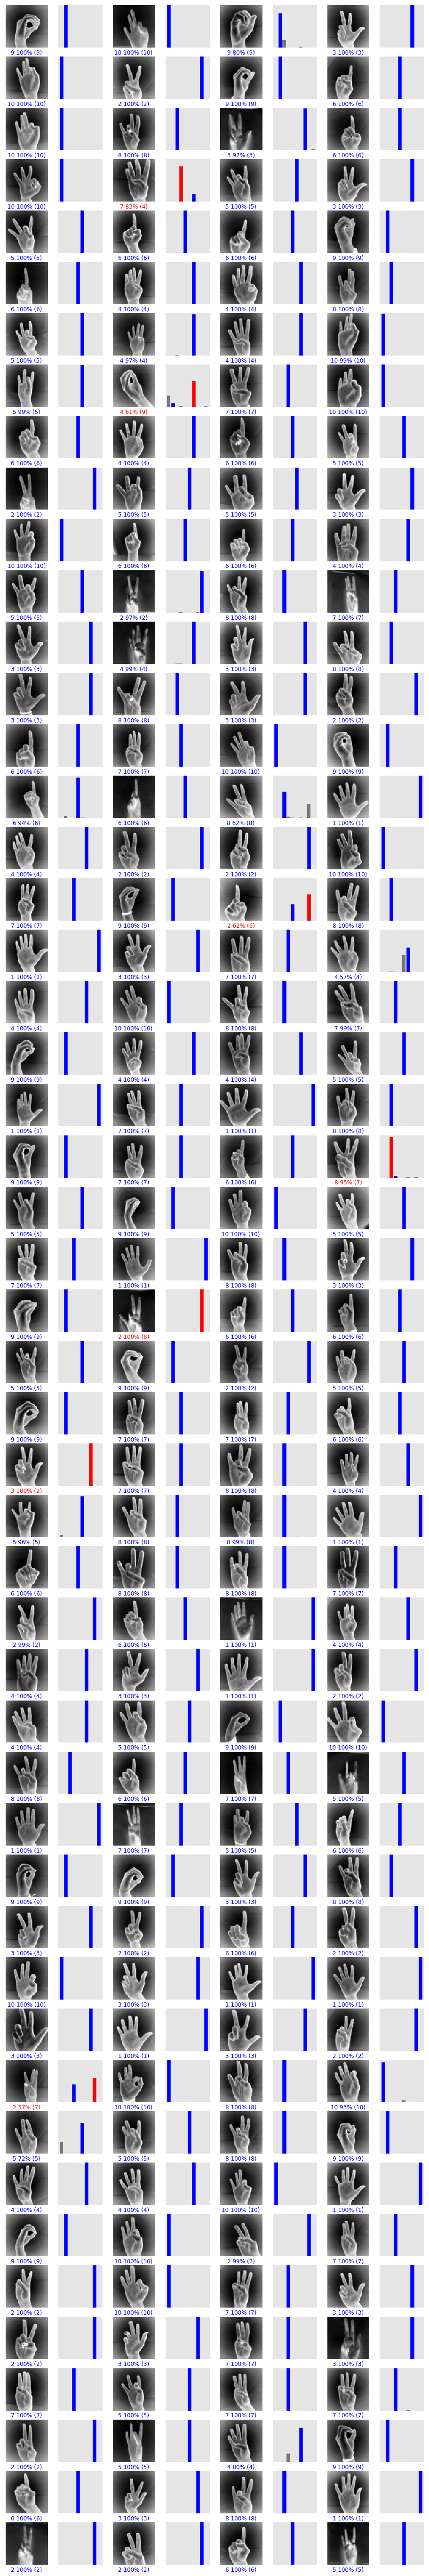

In [ ]:
num_rows = 50
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, yTest, xTest_orig)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, yTest)
plt.show()